In [ ]:
# Biblioteku pievienošana
import pandas as pd
from google.colab import drive
import matplotlib
import matplotlib.pyplot as plt
import copy

In [ ]:
# Google diska pievienošana
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Datu pievienošana
# Pilna datu kopa
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stars dataset full.csv')

In [ ]:
# Datu tipu atspoguļošana
print(df.dtypes)

Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star type                   int64
Star color                 object
Spectral Class             object
dtype: object


In [ ]:
# Changing Object type to category
df["Star color"] = df["Star color"].astype('category')
df["Spectral Class"] = df["Spectral Class"].astype('category')
print(df.dtypes)

Temperature (K)              int64
Luminosity(L/Lo)           float64
Radius(R/Ro)               float64
Absolute magnitude(Mv)     float64
Star type                    int64
Star color                category
Spectral Class            category
dtype: object


In [ ]:
# Print the first 7 entries in the dataset
print(df.head(7))

   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             9320         29.000000       1.91000                   1.236   
1             3600     320000.000000      29.00000                  -6.600   
2             2778          0.000849       0.11200                  19.450   
3             3523          0.000957       0.12900                  16.350   
4            12984          0.000880       0.00996                  11.230   
5             3200     195000.000000      17.00000                  -7.220   
6            17140        883.000000       5.65300                  -2.640   

   Star type  Star color Spectral Class  
0          3  Blue-white              A  
1          4         Red              M  
2          0         Red              M  
3          0         Red              M  
4          2  Blue White              B  
5          4         Red              M  
6          3  Blue-white              B  


In [ ]:
# Adding rows that convert category to int
df["Star color cat"] = df["Star color"].cat.codes
df["Spectral Class cat"] = df["Spectral Class"].cat.codes
# Display types
print(df.dtypes)
# Print the first 7 entries in the dataset
print(df.head(7))

Temperature (K)              int64
Luminosity(L/Lo)           float64
Radius(R/Ro)               float64
Absolute magnitude(Mv)     float64
Star type                    int64
Star color                category
Spectral Class            category
Star color cat                int8
Spectral Class cat            int8
dtype: object
   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             9320         29.000000       1.91000                   1.236   
1             3600     320000.000000      29.00000                  -6.600   
2             2778          0.000849       0.11200                  19.450   
3             3523          0.000957       0.12900                  16.350   
4            12984          0.000880       0.00996                  11.230   
5             3200     195000.000000      17.00000                  -7.220   
6            17140        883.000000       5.65300                  -2.640   

   Star type  Star color Spectral Class  Star 

In [ ]:
# Making a smaller dataset with only number type collumns
sdf= df[["Star type","Temperature (K)","Luminosity(L/Lo)","Radius(R/Ro)","Absolute magnitude(Mv)","Star color cat","Spectral Class cat"]]
# Kopija SDF, jo SDF dati tālāk tiks pārveidoti
sdf1 = df[["Star type","Temperature (K)","Luminosity(L/Lo)","Radius(R/Ro)","Absolute magnitude(Mv)","Star color cat","Spectral Class cat"]]
print(sdf.dtypes)

Star type                   int64
Temperature (K)             int64
Luminosity(L/Lo)          float64
Radius(R/Ro)              float64
Absolute magnitude(Mv)    float64
Star color cat               int8
Spectral Class cat           int8
dtype: object


In [ ]:
print(sdf.describe())
print(sdf.info())

        Star type  Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
count  240.000000       240.000000        240.000000    240.000000   
mean     2.500000     10497.462500     107188.361635    237.157781   
std      1.711394      9552.425037     179432.244940    517.155763   
min      0.000000      1939.000000          0.000080      0.008400   
25%      1.000000      3344.250000          0.000865      0.102750   
50%      2.500000      5776.000000          0.070500      0.762500   
75%      4.000000     15055.500000     198050.000000     42.750000   
max      5.000000     40000.000000     849420.000000   1948.500000   

       Absolute magnitude(Mv)  Star color cat  Spectral Class cat  
count              240.000000      240.000000          240.000000  
mean                 4.382396        7.250000            3.758333  
std                 10.532512        4.926659            2.090007  
min                -11.920000        0.000000            0.000000  
25%                 -6.232500

All of the entries are non null, so we don't have to change anything

In [ ]:
print(sdf['Star type'].value_counts())
print(sdf['Star color cat'].value_counts())
print(sdf['Spectral Class cat'].value_counts())

Star type
3    40
4    40
0    40
2    40
1    40
5    40
Name: count, dtype: int64
Star color cat
10    112
0      55
6      26
2      10
17      8
11      7
15      3
3       3
16      3
7       2
13      2
18      2
1       1
14      1
5       1
12      1
4       1
8       1
9       1
Name: count, dtype: int64
Spectral Class cat
5    111
1     46
6     40
0     19
2     17
4      6
3      1
Name: count, dtype: int64


In [ ]:
# Data normalisation
sdf['Temperature (K)']=(sdf['Temperature (K)']-sdf['Temperature (K)'].min())/(sdf['Temperature (K)'].max()-sdf['Temperature (K)'].min())
sdf['Luminosity(L/Lo)']=(sdf['Luminosity(L/Lo)']-sdf['Luminosity(L/Lo)'].min())/(sdf['Luminosity(L/Lo)'].max()-sdf['Luminosity(L/Lo)'].min())
sdf['Radius(R/Ro)']=(sdf['Radius(R/Ro)']-sdf['Radius(R/Ro)'].min())/(sdf['Radius(R/Ro)'].max()-sdf['Radius(R/Ro)'].min())
sdf['Absolute magnitude(Mv)']=(sdf['Absolute magnitude(Mv)']-sdf['Absolute magnitude(Mv)'].min())/(sdf['Absolute magnitude(Mv)'].max()-sdf['Absolute magnitude(Mv)'].min())
print(sdf.head(10))
print(sdf.describe())

   Star type  Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
0          3         0.193926      3.414085e-05  9.759344e-04   
1          4         0.043640      3.767276e-01  1.487900e-02   
2          0         0.022044      9.053236e-10  5.316933e-05   
3          0         0.041617      1.032469e-09  6.189403e-05   
4          2         0.290192      9.418191e-10  8.006193e-07   
5          4         0.033131      2.295684e-01  8.720387e-03   
6          3         0.399385      1.039533e-03  2.896908e-03   
7          1         0.040908      1.377410e-09  1.681301e-04   
8          3         0.897743      2.331002e-01  5.230508e-03   
9          1         0.035863      9.912646e-09  8.806812e-05   

   Absolute magnitude(Mv)  Star color cat  Spectral Class cat  
0                0.411382               6                   0  
1                0.166354              10                   5  
2                0.980926              10                   5  
3                0.883990   

<ipython-input-66-dbf77a960d00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Temperature (K)']=(sdf['Temperature (K)']-sdf['Temperature (K)'].min())/(sdf['Temperature (K)'].max()-sdf['Temperature (K)'].min())
<ipython-input-66-dbf77a960d00>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sdf['Luminosity(L/Lo)']=(sdf['Luminosity(L/Lo)']-sdf['Luminosity(L/Lo)'].min())/(sdf['Luminosity(L/Lo)'].max()-sdf['Luminosity(L/Lo)'].min())
<ipython-input-66-dbf77a960d00>:4: SettingWithCopyWarning: 
A value is 

<Axes: >

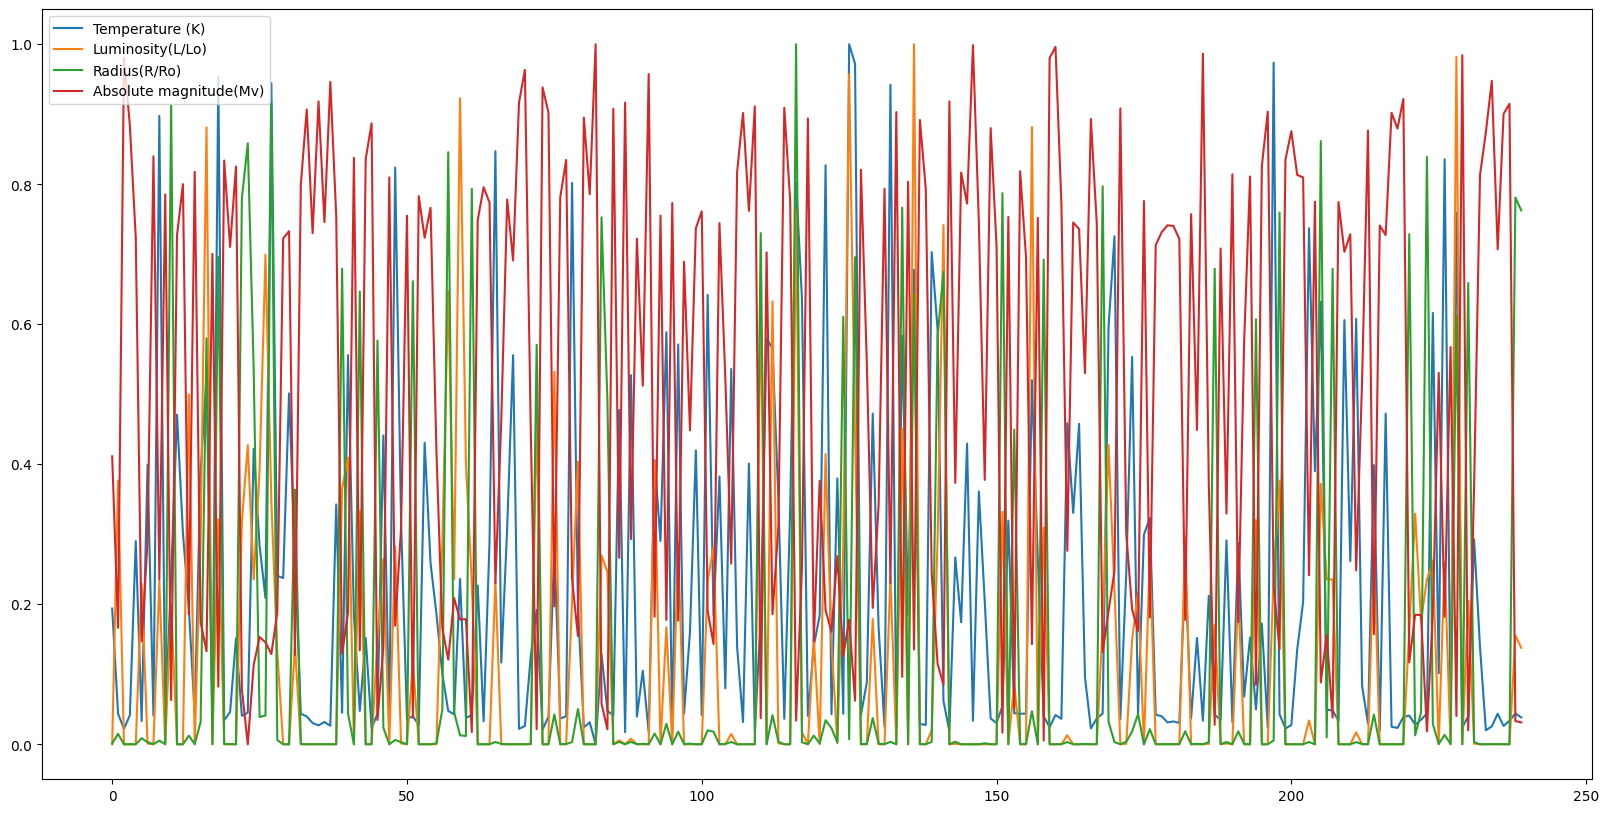

In [ ]:
#Vērtību vizualizācijai tiek atlasīti tikai atribūti ar skaitliskām vērtībām nepārtrauktajā skalā
sdf_visual = sdf[["Temperature (K)","Luminosity(L/Lo)","Radius(R/Ro)","Absolute magnitude(Mv)"]]
#Vērtību attēlojuma izvade
sdf_visual.plot(figsize=(20,10))

array([[<Axes: title={'center': 'Star type'}>,
        <Axes: title={'center': 'Temperature (K)'}>,
        <Axes: title={'center': 'Luminosity(L/Lo)'}>],
       [<Axes: title={'center': 'Radius(R/Ro)'}>,
        <Axes: title={'center': 'Absolute magnitude(Mv)'}>,
        <Axes: title={'center': 'Star color cat'}>],
       [<Axes: title={'center': 'Spectral Class cat'}>, <Axes: >,
        <Axes: >]], dtype=object)

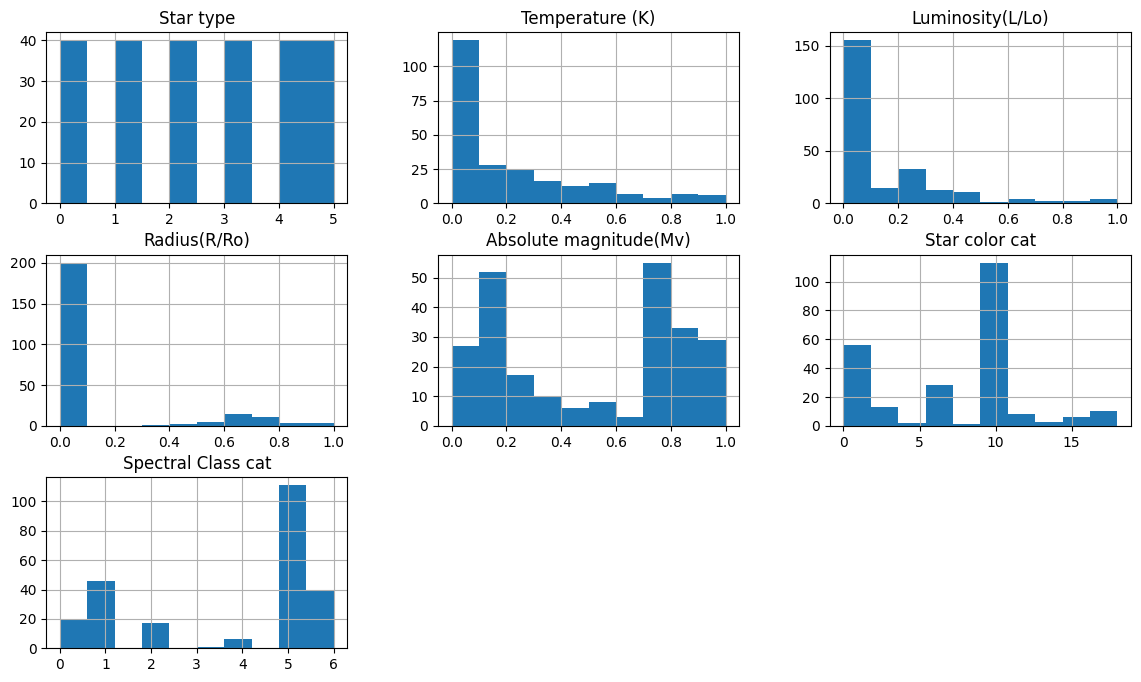

In [ ]:
# Making a histogram
sdf.hist(figsize=(14,8))

Make analysis of these graphs

In [ ]:
# Datu sadalīšana apmācības un testēšanas daļai

# Nenormēta
# Apmācībai
df_train = sdf1.head(200)
train_data = df_train.drop('Star type', axis = 1)
train_result = df_train['Star type']
print(train_result.value_counts(ascending = True))
print(train_result.value_counts(normalize = True))
# Testēšanai
df_test = sdf1.tail(40)
test_data = df_test.drop('Star type', axis = 1)
test_result = df_test['Star type']
print(test_result.value_counts(ascending = True))
print(train_result.value_counts(normalize = True))
test_result_arr = test_result.to_numpy()

# Normēta datu kopa
# Apmācībai
df_train_norm = sdf.head(200)
train_data_norm = df_train_norm.drop('Star type', axis = 1)
train_result_norm = df_train_norm['Star type']

# Testēšanai
df_test_norm = sdf.tail(40)
test_data_norm = df_test_norm.drop('Star type', axis = 1)
test_result_norm = df_test_norm['Star type']
test_result_arr_norm = test_result_norm.to_numpy()

Star type
0    30
5    32
2    33
3    34
4    34
1    37
Name: count, dtype: int64
Star type
1    0.185
3    0.170
4    0.170
2    0.165
5    0.160
0    0.150
Name: proportion, dtype: float64
Star type
1     3
3     6
4     6
2     7
5     8
0    10
Name: count, dtype: int64
Star type
1    0.185
3    0.170
4    0.170
2    0.165
5    0.160
0    0.150
Name: proportion, dtype: float64


In [ ]:
# Funkcija datu un grafiku izvadei
from sklearn import metrics
def analyse_results(predicted_values, actual_values = test_result):
  labels = ["BrP", "SP", "BaP", "GSZ", "PmZ", "HmZ"]
  print(metrics.classification_report(actual_values, predicted_values, target_names = labels, zero_division=0))
  confusionMatrix = metrics.confusion_matrix(actual_values, predictions)
  plot_cm = metrics.ConfusionMatrixDisplay(confusionMatrix, display_labels = labels)
  plot_cm.plot()
  plt.title('Kļūdu matrica')
  plt.ylabel('Īstās klašu iezīmes')
  plt.xlabel('Paredzētās klašu iezīmes')
  plt.show()

# Herarhijas algoritms

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

sdf_for_hierarhijas_alg = sdf[["Temperature (K)","Luminosity(L/Lo)","Radius(R/Ro)","Absolute magnitude(Mv)"]]

# Honestly I don't know what this is for
clustering = AgglomerativeClustering().fit(sdf_for_hierarhijas_alg)

## Eksperimenti

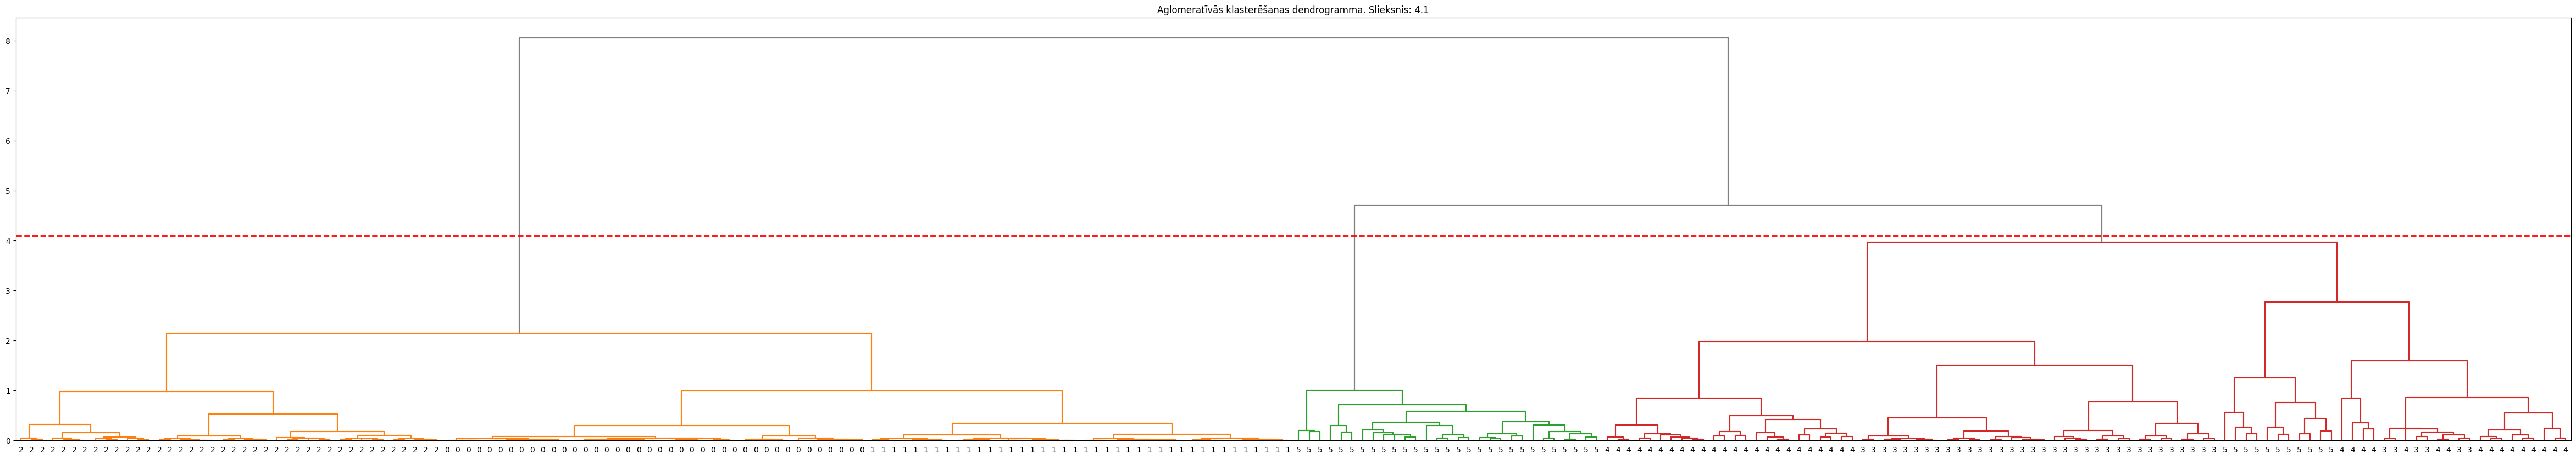

In [ ]:
star_types = sdf['Star type'].tolist()
threshold = 4.1

plt.figure(figsize =(60, 10))
plt.title('Aglomeratīvās klasterēšanas dendrogramma. Slieksnis: '+str(threshold))
Dendrogram = shc.dendrogram((shc.linkage(sdf_for_hierarhijas_alg, method ='ward')), labels=star_types)


# Plotting the dendrogram
dendrogram = shc.dendrogram(
   shc.linkage(sdf_for_hierarhijas_alg, method ='ward'),
    labels=star_types,
    leaf_font_size=10,  # Adjusting the font size of the leaf labels
    leaf_rotation=0,  # Rotating the leaf labels for better readability
    color_threshold=threshold,
    above_threshold_color='gray'
)

# Adding a horizontal line for the threshold
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2)

plt.show()

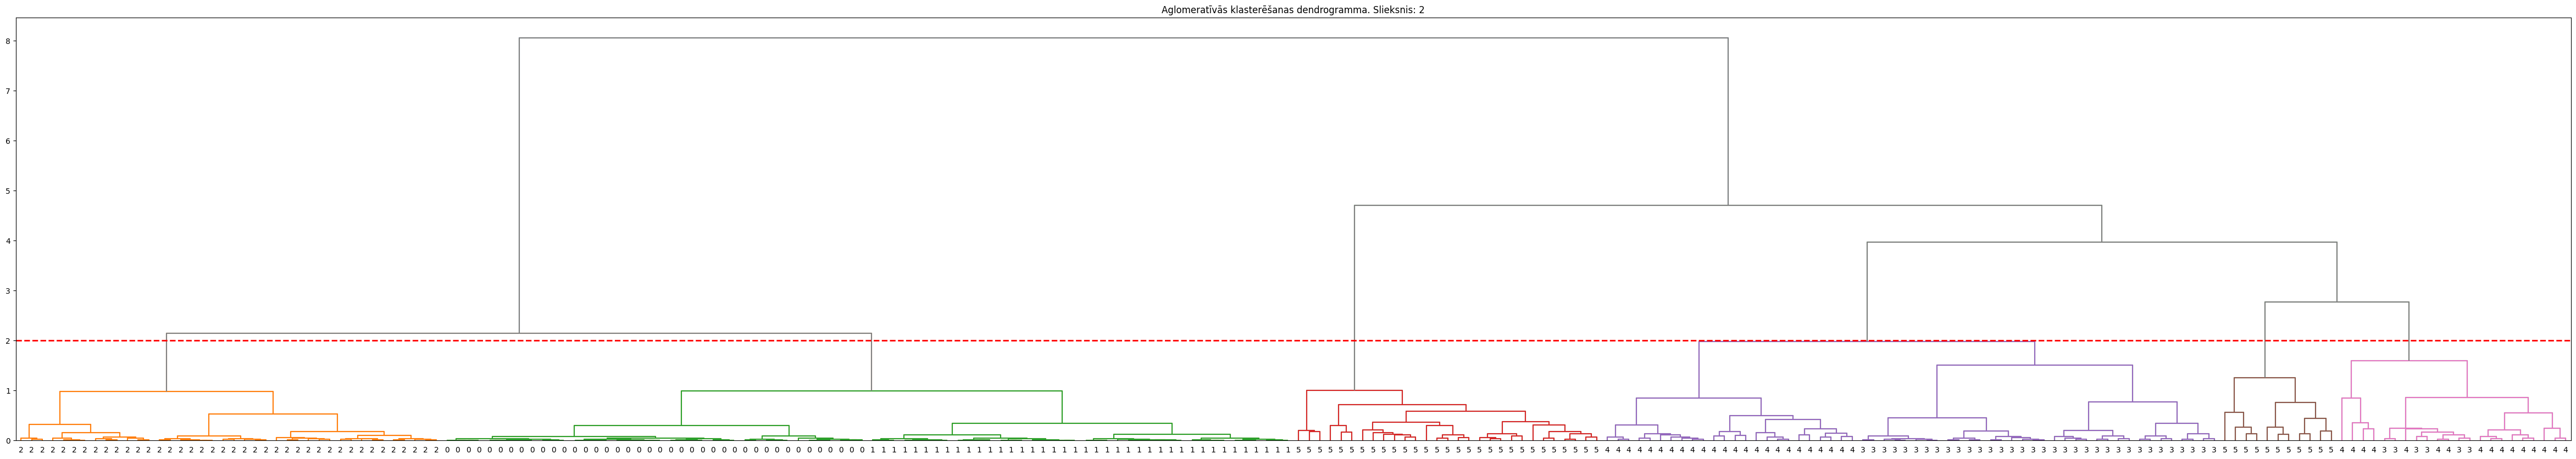

In [ ]:
star_types = sdf['Star type'].tolist()
threshold = 2

plt.figure(figsize =(60, 10))
plt.title('Aglomeratīvās klasterēšanas dendrogramma. Slieksnis: '+str(threshold))
Dendrogram = shc.dendrogram((shc.linkage(sdf_for_hierarhijas_alg, method ='ward')), labels=star_types)


# Plotting the dendrogram
dendrogram = shc.dendrogram(
   shc.linkage(sdf_for_hierarhijas_alg, method ='ward'),
    labels=star_types,
    leaf_font_size=10,  # Adjusting the font size of the leaf labels
    leaf_rotation=0,  # Rotating the leaf labels for better readability
    color_threshold=threshold,
    above_threshold_color='gray'
)

# Adding a horizontal line for the threshold
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2)

plt.show()

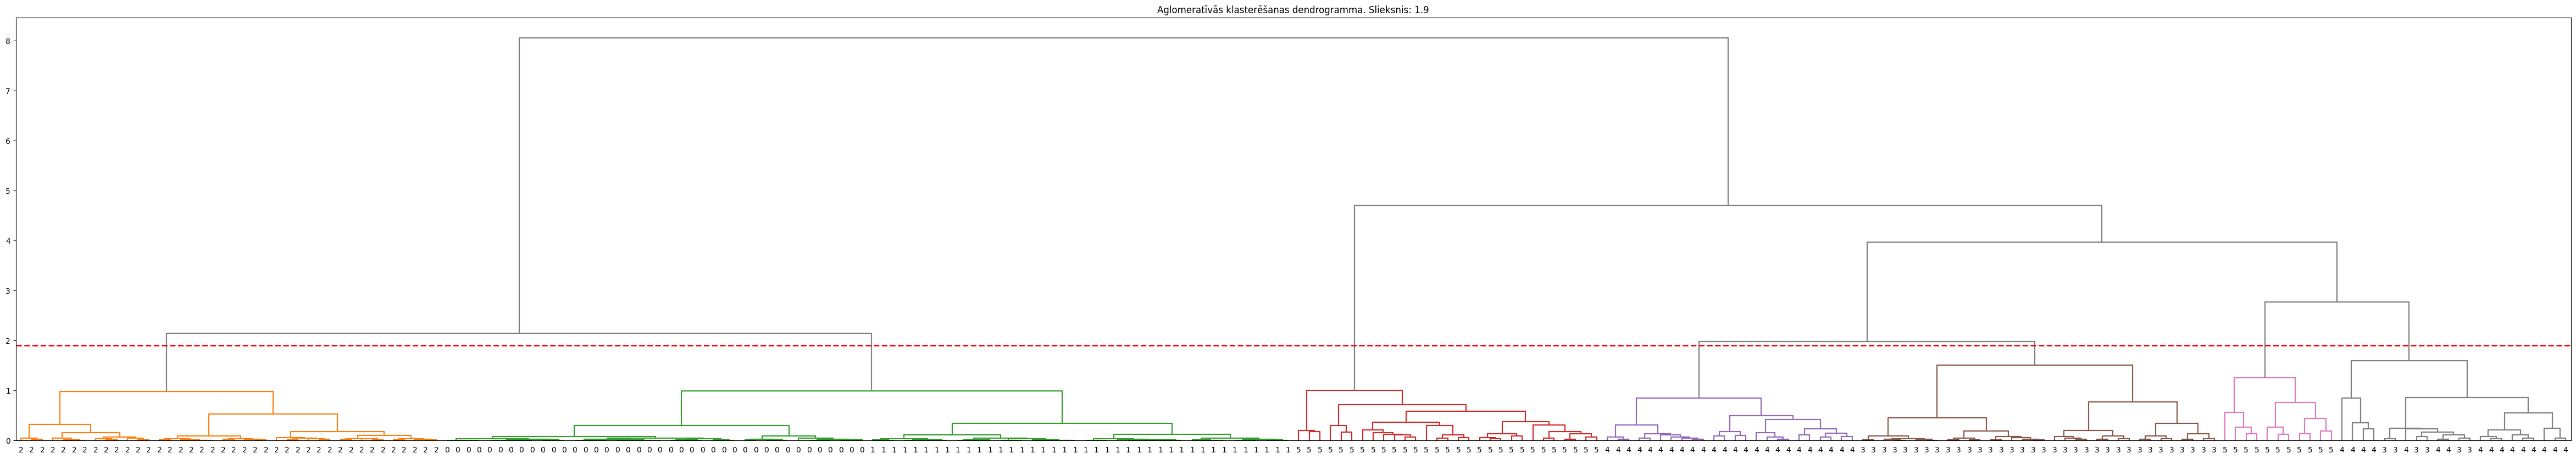

In [ ]:
star_types = sdf['Star type'].tolist()
threshold = 1.9

plt.figure(figsize =(60, 10))
plt.title('Aglomeratīvās klasterēšanas dendrogramma. Slieksnis: '+str(threshold))
Dendrogram = shc.dendrogram((shc.linkage(sdf_for_hierarhijas_alg, method ='ward')), labels=star_types)


# Plotting the dendrogram
dendrogram = shc.dendrogram(
   shc.linkage(sdf_for_hierarhijas_alg, method ='ward'),
    labels=star_types,
    leaf_font_size=10,  # Adjusting the font size of the leaf labels
    leaf_rotation=0,  # Rotating the leaf labels for better readability
    color_threshold=threshold,
    above_threshold_color='gray'
)

# Adding a horizontal line for the threshold
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2)

plt.show()

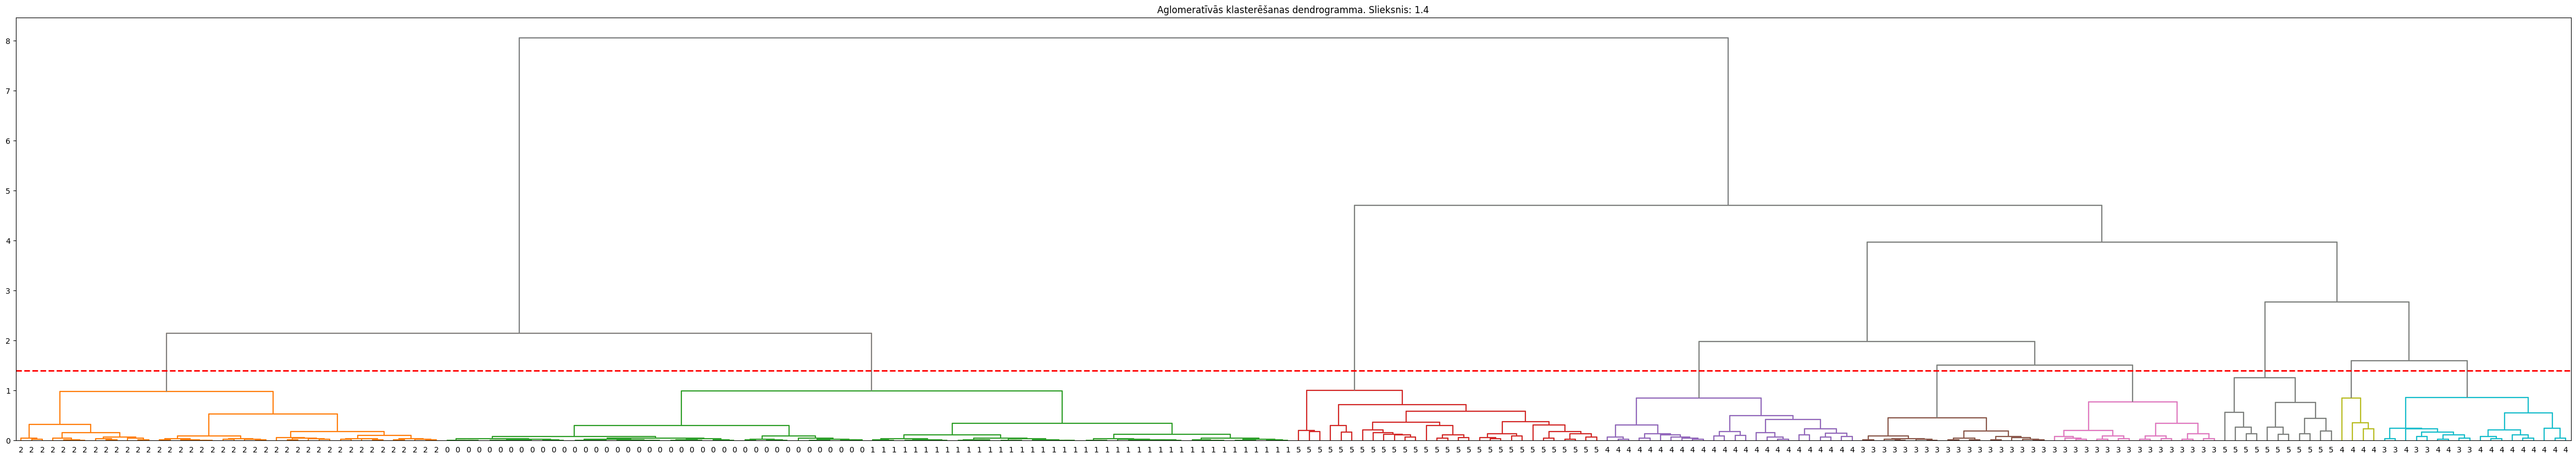

In [ ]:
star_types = sdf['Star type'].tolist()
threshold = 1.4

plt.figure(figsize =(60, 10))
plt.title('Aglomeratīvās klasterēšanas dendrogramma. Slieksnis: '+str(threshold))
Dendrogram = shc.dendrogram((shc.linkage(sdf_for_hierarhijas_alg, method ='ward')), labels=star_types)


# Plotting the dendrogram
dendrogram = shc.dendrogram(
   shc.linkage(sdf_for_hierarhijas_alg, method ='ward'),
    labels=star_types,
    leaf_font_size=10,  # Adjusting the font size of the leaf labels
    leaf_rotation=0,  # Rotating the leaf labels for better readability
    color_threshold=threshold,
    above_threshold_color='gray'
)

# Adding a horizontal line for the threshold
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2)

plt.show()

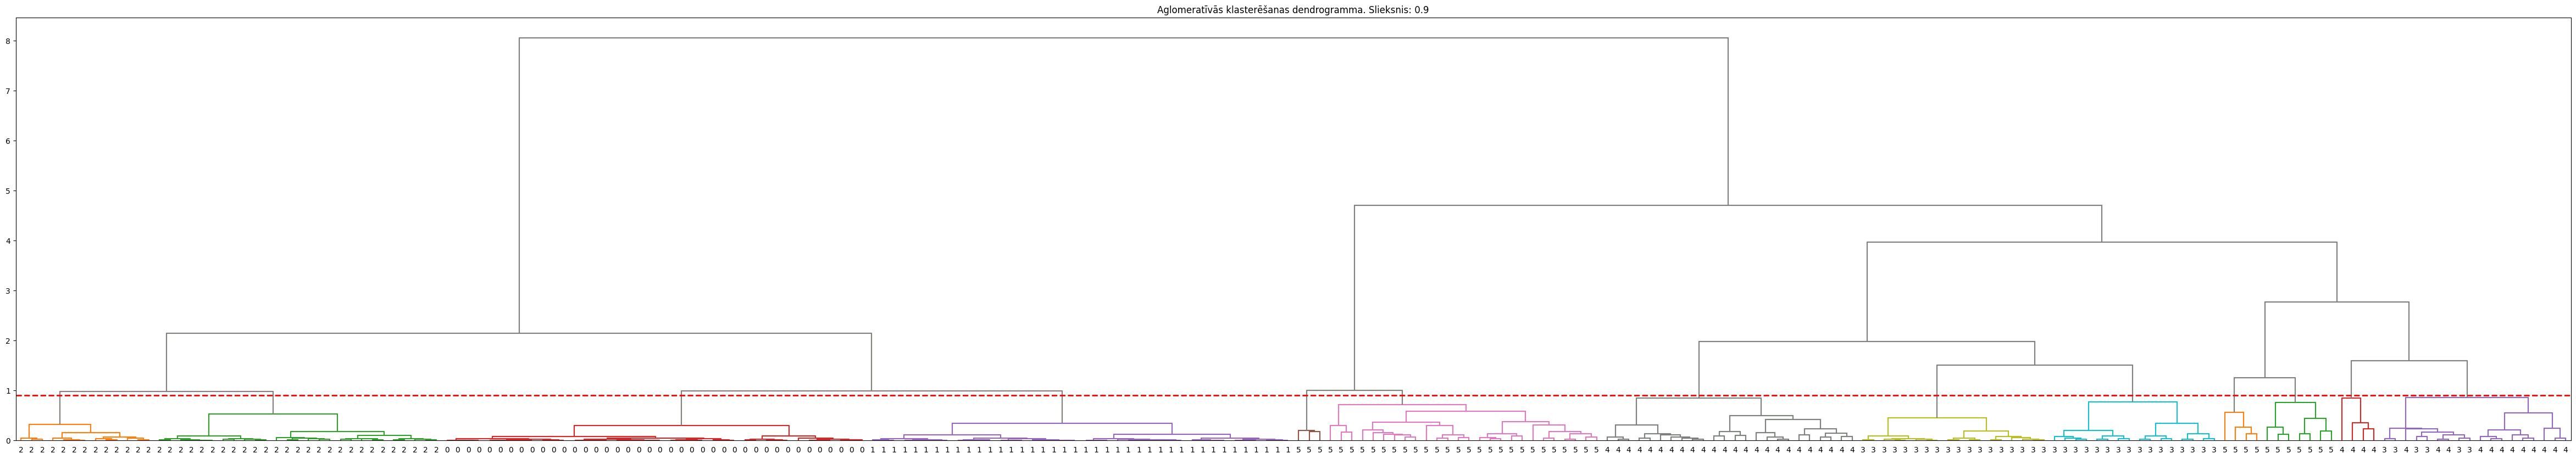

In [ ]:
star_types = sdf['Star type'].tolist()
threshold = 0.9

plt.figure(figsize =(60, 10))
plt.title('Aglomeratīvās klasterēšanas dendrogramma. Slieksnis: '+str(threshold))
Dendrogram = shc.dendrogram((shc.linkage(sdf_for_hierarhijas_alg, method ='ward')), labels=star_types)


# Plotting the dendrogram
dendrogram = shc.dendrogram(
   shc.linkage(sdf_for_hierarhijas_alg, method ='ward'),
    labels=star_types,
    leaf_font_size=10,  # Adjusting the font size of the leaf labels
    leaf_rotation=0,  # Rotating the leaf labels for better readability
    color_threshold=threshold,
    above_threshold_color='gray'
)

# Adding a horizontal line for the threshold
plt.axhline(y=threshold, color='r', linestyle='--', linewidth=2)

plt.show()


### Naive Bayes classifier

Gauss Naive Bayes balstās uz Bayesa teorēmu, kas nosaka varbūtību, ka kāda ieraksta atribūtu kopums pieder konkrētai klasei. Algoritma pamatā ir pieņēmums, ka visi atribūti ir nejauši sadalīti un ir atkarīgi tikai no klases. Tas nozīmē, ka, ņemot vērā klasi, atribūtu vērtības tiek uzskatītas par nekorelētām, un katrs atribūts tiek pieņemts par atbilstīgu normālajam sadalījumam. Procesa gaitā algoritms apskata treniņdatu, lai iemācītos atribūtu sadalījumus katrā klases grupā. Kad tas ir paveikts, jauns ieraksts tiek klasificēts, izmantojot Bayesa teorēmu, lai noteiktu, kura klase ir visvairāk varbūtīga, ņemot vērā ieraksta atribūtu vērtības.




Eksperiments Nr. 1
Hiperparametri:
var_smoothing = 1e-9
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.33      0.67      0.44         3
           2       0.78      1.00      0.88         7
           3       1.00      0.50      0.67         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         8

    accuracy                           0.82        40
   macro avg       0.83      0.81      0.79        40
weighted avg       0.88      0.82      0.83        40



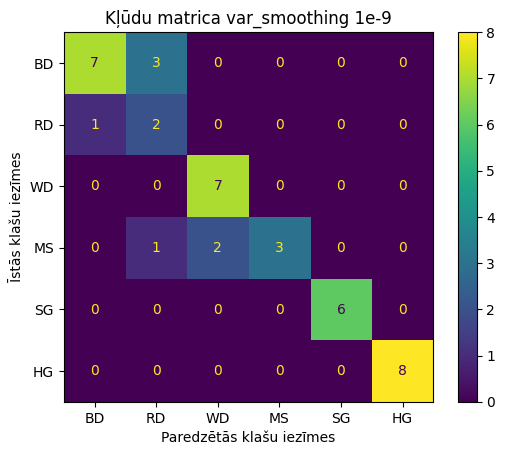

Eksperiments Nr. 2
Hiperparametri:
var_smoothing = 1e-7
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        10
           1       0.33      0.67      0.44         3
           2       0.78      1.00      0.88         7
           3       1.00      0.50      0.67         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         8

    accuracy                           0.82        40
   macro avg       0.83      0.81      0.79        40
weighted avg       0.88      0.82      0.83        40



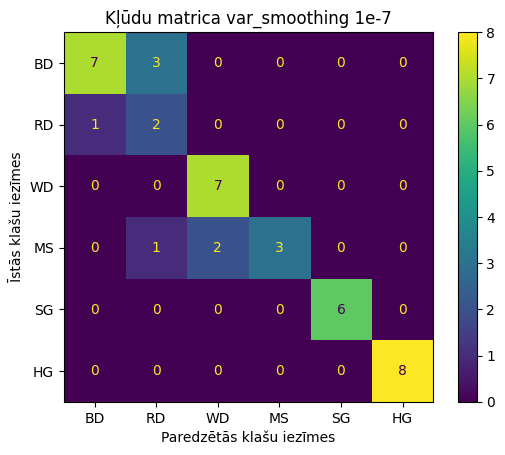

Eksperiments Nr. 3
Hiperparametri:
var_smoothing = 1e-5
              precision    recall  f1-score   support

           0       0.50      0.10      0.17        10
           1       0.17      0.67      0.27         3
           2       0.70      1.00      0.82         7
           3       0.67      0.33      0.44         6
           4       1.00      0.83      0.91         6
           5       1.00      1.00      1.00         8

    accuracy                           0.62        40
   macro avg       0.67      0.66      0.60        40
weighted avg       0.71      0.62      0.61        40



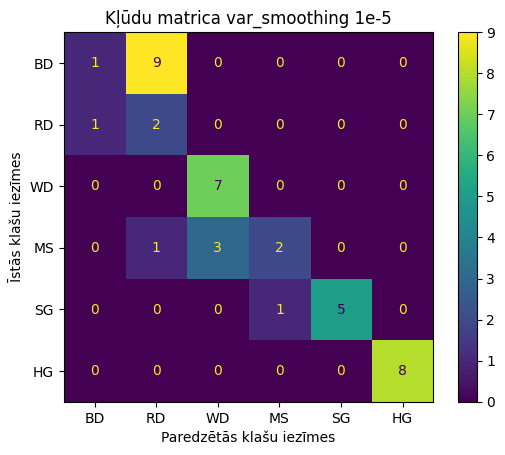

Eksperiments Nr. 4
Hiperparametri:
var_smoothing = 1e-3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.17      1.00      0.29         3
           2       0.83      0.71      0.77         7
           3       0.40      0.33      0.36         6
           4       0.60      0.50      0.55         6
           5       0.50      0.38      0.43         8

    accuracy                           0.40        40
   macro avg       0.42      0.49      0.40        40
weighted avg       0.41      0.40      0.38        40



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


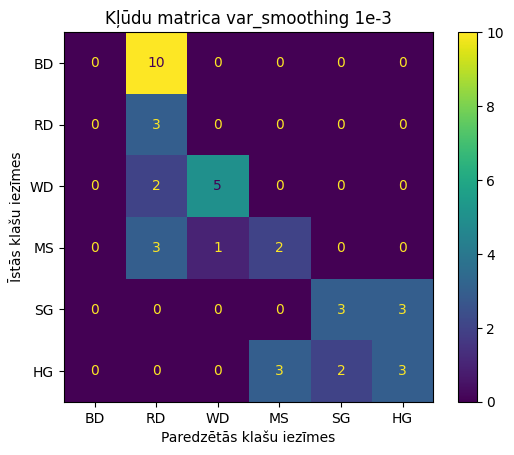

Eksperiments Nr. 7
Hiperparametri:
var_smoothing = 1e-15
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3
           2       1.00      0.86      0.92         7
           3       0.86      1.00      0.92         6
           4       1.00      1.00      1.00         6
           5       1.00      1.00      1.00         8

    accuracy                           0.97        40
   macro avg       0.98      0.98      0.97        40
weighted avg       0.98      0.97      0.97        40



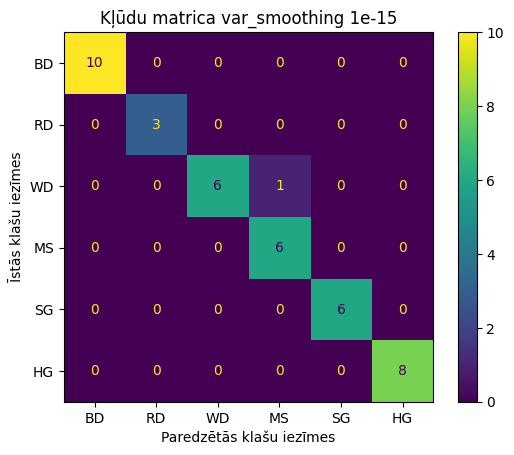

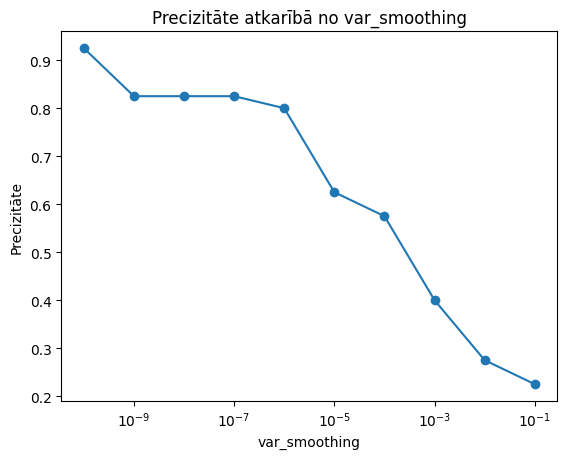

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

naive_bayes = GaussianNB()
naive_bayes.fit(train_data, train_result)


predictions = naive_bayes.predict(test_data)

print("="*60)
print("Eksperiments Nr. 1")
print("="*60)
print("Hiperparametri:\nvar_smoothing = 1e-9")
print("="*60)
print(metrics.classification_report(test_result_arr, predictions))
print("="*60)

labels = ["BD", "RD", "WD", "MS", "SG", "HG"]
confusion_matrix = metrics.confusion_matrix(test_result_arr, predictions)
plot_cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=labels)
plot_cm.plot()
plt.title('Kļūdu matrica var_smoothing 1e-9')
plt.ylabel('Īstās klašu iezīmes')
plt.xlabel('Paredzētās klašu iezīmes')
plt.show()


naive_bayes1 = GaussianNB(var_smoothing=1e-7)
naive_bayes1.fit(train_data, train_result)


predictions = naive_bayes1.predict(test_data)

print("="*60)
print("Eksperiments Nr. 2")
print("="*60)
print("Hiperparametri:\nvar_smoothing = 1e-7")
print("="*60)
print(metrics.classification_report(test_result_arr, predictions))
print("="*60)


labels = ["BD", "RD", "WD", "MS", "SG", "HG"]
confusion_matrix = metrics.confusion_matrix(test_result_arr, predictions)
plot_cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=labels)
plot_cm.plot()
plt.title('Kļūdu matrica var_smoothing 1e-7')
plt.ylabel('Īstās klašu iezīmes')
plt.xlabel('Paredzētās klašu iezīmes')
plt.show()


naive_bayes2 = GaussianNB(var_smoothing=1e-5)
naive_bayes2.fit(train_data, train_result)


predictions = naive_bayes2.predict(test_data)

print("="*60)
print("Eksperiments Nr. 3")
print("="*60)
print("Hiperparametri:\nvar_smoothing = 1e-5")
print("="*60)
print(metrics.classification_report(test_result_arr, predictions))
print("="*60)


labels = ["BD", "RD", "WD", "MS", "SG", "HG"]
confusion_matrix = metrics.confusion_matrix(test_result_arr, predictions)
plot_cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=labels)
plot_cm.plot()
plt.title('Kļūdu matrica var_smoothing 1e-5')
plt.ylabel('Īstās klašu iezīmes')
plt.xlabel('Paredzētās klašu iezīmes')
plt.show()


naive_bayes3 = GaussianNB(var_smoothing=1e-3)
naive_bayes3.fit(train_data, train_result)


predictions = naive_bayes3.predict(test_data)


print("="*60)
print("Eksperiments Nr. 4")
print("="*60)
print("Hiperparametri:\nvar_smoothing = 1e-3")
print("="*60)
print(metrics.classification_report(test_result_arr, predictions))
print("="*60)

labels = ["BD", "RD", "WD", "MS", "SG", "HG"]
confusion_matrix = metrics.confusion_matrix(test_result_arr, predictions)
plot_cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=labels)
plot_cm.plot()
plt.title('Kļūdu matrica var_smoothing 1e-3')
plt.ylabel('Īstās klašu iezīmes')
plt.xlabel('Paredzētās klašu iezīmes')
plt.show()


naive_bayes4 = GaussianNB(var_smoothing=1e-15)
naive_bayes4.fit(train_data, train_result)


predictions = naive_bayes4.predict(test_data)

print("="*60)
print("Eksperiments Nr. 7")
print("="*60)
print("Hiperparametri:\nvar_smoothing = 1e-15")
print("="*60)
print(metrics.classification_report(test_result_arr, predictions))
print("="*60)


labels = ["BD", "RD", "WD", "MS", "SG", "HG"]
confusion_matrix = metrics.confusion_matrix(test_result_arr, predictions)
plot_cm = metrics.ConfusionMatrixDisplay(confusion_matrix, display_labels=labels)
plot_cm.plot()
plt.title('Kļūdu matrica var_smoothing 1e-15')
plt.ylabel('Īstās klašu iezīmes')
plt.xlabel('Paredzētās klašu iezīmes')
plt.show()


var_smoothing_values = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

accuracies = []

for var_smoothing in var_smoothing_values:
    naive_bayes = GaussianNB(var_smoothing=var_smoothing)
    naive_bayes.fit(train_data, train_result)

    predictions = naive_bayes.predict(test_data)

    accuracy = metrics.accuracy_score(test_result_arr, predictions)
    accuracies.append(accuracy)

plt.plot(var_smoothing_values, accuracies, marker='o')
plt.title('Precizitāte atkarībā no var_smoothing')
plt.xlabel('var_smoothing')
plt.ylabel('Precizitāte')
plt.xscale('log')
plt.show()

# Random Forest
Šis algoritms patvaļīgi sadala datu kopu apakškopās un katrai apakškopai izveido un pielāgo savu lēmumu koku. Cenšoties paredzēt rezultātu, "Random forest" iegūst atsevišķos novērtējumus no katra lēmumu koka un kā rezultātu izvada visbiežāk noteikto rezultātu.

Eksperiments Nr. 1
Hiperparametri: 
Koku skaits: 100
Koku maksimālais dziļums: Nav
              precision    recall  f1-score   support

         BrP       1.00      1.00      1.00        10
          SP       0.75      1.00      0.86         3
         BaP       1.00      1.00      1.00         7
         GSZ       1.00      0.83      0.91         6
         PmZ       1.00      1.00      1.00         6
         HmZ       1.00      1.00      1.00         8

    accuracy                           0.97        40
   macro avg       0.96      0.97      0.96        40
weighted avg       0.98      0.97      0.98        40



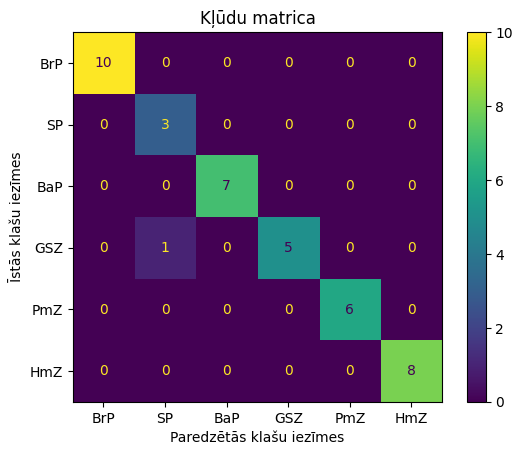

Eksperiments Nr. 2
Hiperparametri: 
Koku skaits: 10
Koku maksimālais dziļums: 5
              precision    recall  f1-score   support

         BrP       1.00      1.00      1.00        10
          SP       0.75      1.00      0.86         3
         BaP       1.00      1.00      1.00         7
         GSZ       1.00      0.83      0.91         6
         PmZ       1.00      1.00      1.00         6
         HmZ       1.00      1.00      1.00         8

    accuracy                           0.97        40
   macro avg       0.96      0.97      0.96        40
weighted avg       0.98      0.97      0.98        40



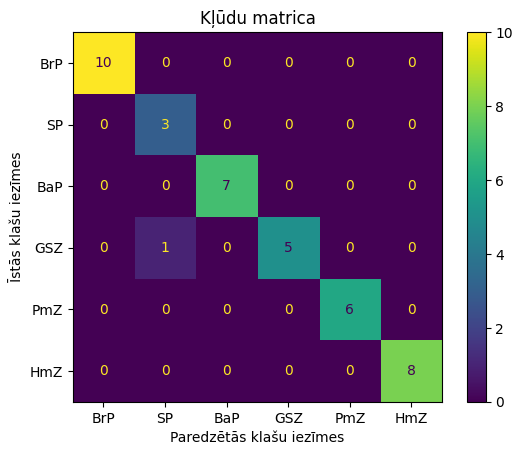

Eksperiments Nr. 3
Hiperparametri: 
Koku skaits: 5
Koku maksimālais dziļums: 2
              precision    recall  f1-score   support

         BrP       1.00      1.00      1.00        10
          SP       0.60      1.00      0.75         3
         BaP       1.00      1.00      1.00         7
         GSZ       1.00      1.00      1.00         6
         PmZ       1.00      0.50      0.67         6
         HmZ       0.89      1.00      0.94         8

    accuracy                           0.93        40
   macro avg       0.91      0.92      0.89        40
weighted avg       0.95      0.93      0.92        40



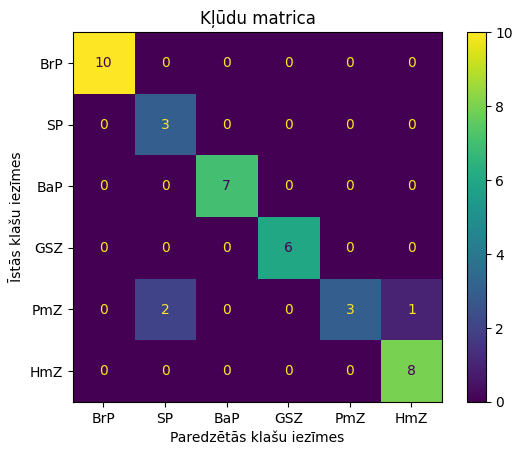

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree

#randomForest = RandomForestClassifier() # n_estimators = 100 Default
#randomForest.fit(train_data, train_result)

#randomForest.fit(train_data, train_result)
exp_nr = 1
print("Eksperiments Nr. "+str(exp_nr))
print("="*50)
print("Hiperparametri: ")
print("Koku skaits: 100")
print("Koku maksimālais dziļums: Nav")
print("="*50)
randomForest = RandomForestClassifier() # Bibliotēkas standartvērtības
randomForest.fit(train_data, train_result)
predictions = randomForest.predict(test_data)
analyse_results(predictions)
exp_nr += 1
print("="*50)

print("Eksperiments Nr. "+str(exp_nr))
print("="*50)
print("Hiperparametri: ")
print("Koku skaits: 10")
print("Koku maksimālais dziļums: 5")
print("="*50)
randomForest = RandomForestClassifier(n_estimators = 10, max_depth = 5)
randomForest.fit(train_data, train_result)
predictions = randomForest.predict(test_data)
analyse_results(predictions)
exp_nr += 1
print("="*50)

print("Eksperiments Nr. "+str(exp_nr))
print("="*50)
print("Hiperparametri: ")
print("Koku skaits: 5")
print("Koku maksimālais dziļums: 2")
print("="*50)
randomForest = RandomForestClassifier(n_estimators = 5, max_depth = 2)
randomForest.fit(train_data, train_result)
predictions = randomForest.predict(test_data)
analyse_results(predictions)

# K-Means algorithm

K-means algoritms sāk ar izlases veidā izvēlētiem centriem klasēm un pēc tam iteratīvi piešķir katru datu punktu tam tuvākajam centrālajam punktam, veidojot grupas. Pēc datu piešķiršanas klasēm, algoritms aprēķina jaunus centrālos punktus kā katras grupas vidējo vērtību. Šis process tiek atkārtots līdz brīdim, kad grupu centri vairs nebūtiski mainās, kas norāda uz konverģenci un algoritma izpildes beigām.


Experiment Number: 1
Hyperparameters:
Number of clusters: 4
Silhouette Score: 0.74


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


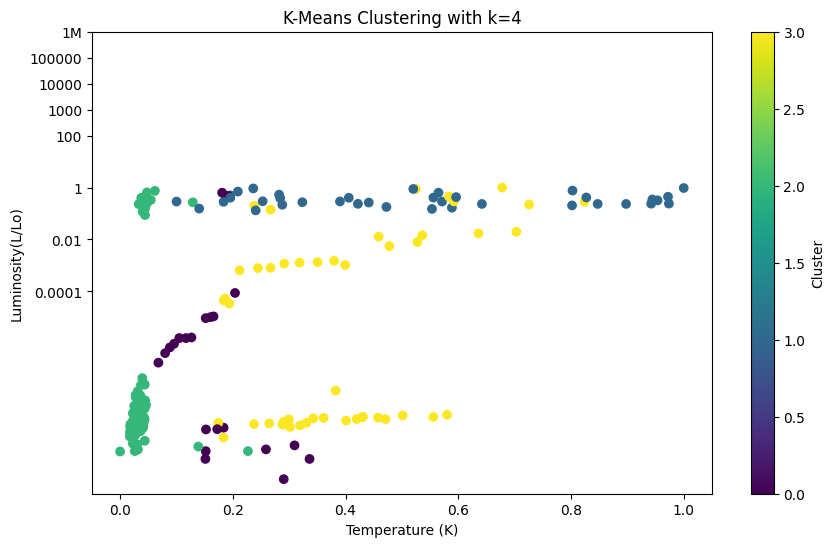

Experiment Number: 2
Hyperparameters:
Number of clusters: 5
Silhouette Score: 0.8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


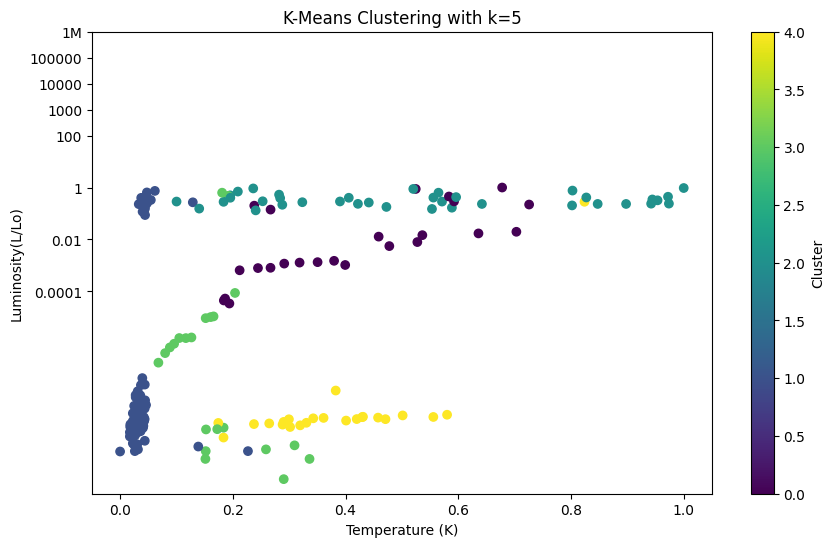

Experiment Number: 3
Hyperparameters:
Number of clusters: 6
Silhouette Score: 0.82


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


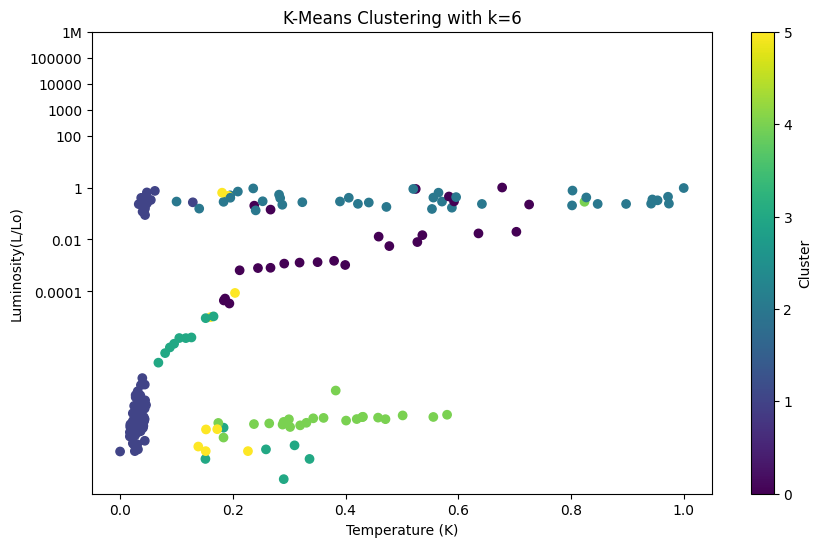

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns


idk = train_data_norm
#k_values = range(4, 7)
k_values = range(4, 7)
exp_nr = 1

for k in k_values:
    print("Experiment Number:", exp_nr)
    print("="*50)
    print("Hyperparameters:")
    print("Number of clusters:", k)
    print("="*50)

    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(idk)
    train_data['Cluster'] = kmeans.labels_  # Update to use 'train_data'

    # Calculate silhouette score for some basic clustering evaluation
    silhouette_avg = silhouette_score(idk, kmeans.labels_)
    print("Silhouette Score:", round(silhouette_avg, 2))

    # Plotting the clusters
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(train_data['Temperature (K)'], train_data['Luminosity(L/Lo)'], c=train_data['Cluster'], cmap='viridis')
    plt.title(f'K-Means Clustering with k={k}')
    plt.xlabel('Temperature (K)')
    plt.ylabel('Luminosity(L/Lo)')
    plt.yscale('log')  # Setting the y-axis to log scale

    # Set the y-axis major ticks at each power of ten, including 1000000
    plt.yticks([0.0001, 0.01, 1, 100, 1000, 10000, 100000, 1000000], ['0.0001', '0.01', '1', '100', '1000', '10000', '100000', '1M'])

    plt.colorbar(scatter, label='Cluster')
    plt.show()

    print("="*50)
    exp_nr += 1


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined 

Classification Report for k=4:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.00      0.00      0.00         3
           2       0.10      0.29      0.14         7
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         8

    accuracy                           0.05        40
   macro avg       0.02      0.05      0.02        40
weighted avg       0.02      0.05      0.03        40



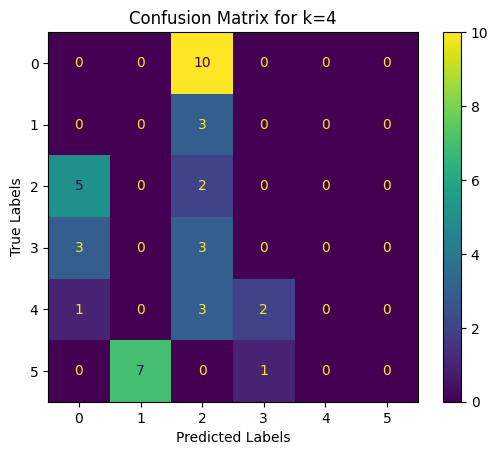

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined 

Classification Report for k=5:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65        10
           1       0.00      0.00      0.00         3
           2       0.56      0.71      0.63         7
           3       0.00      0.00      0.00         6
           4       1.00      0.33      0.50         6
           5       0.00      0.00      0.00         8

    accuracy                           0.42        40
   macro avg       0.34      0.34      0.30        40
weighted avg       0.37      0.42      0.35        40



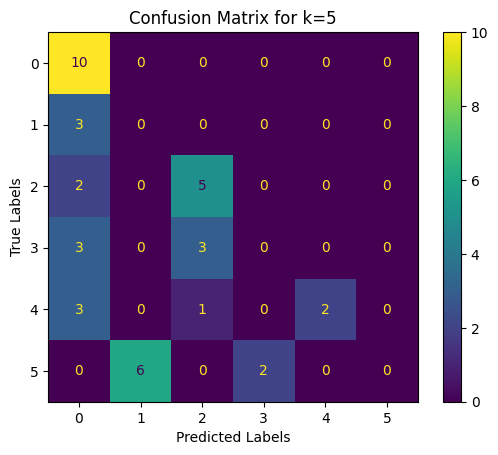

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Classification Report for k=6:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        10
           1       0.18      1.00      0.30         3
           2       0.00      0.00      0.00         7
           3       0.33      0.50      0.40         6
           4       0.00      0.00      0.00         6
           5       0.00      0.00      0.00         8

    accuracy                           0.15        40
   macro avg       0.08      0.25      0.12        40
weighted avg       0.06      0.15      0.08        40



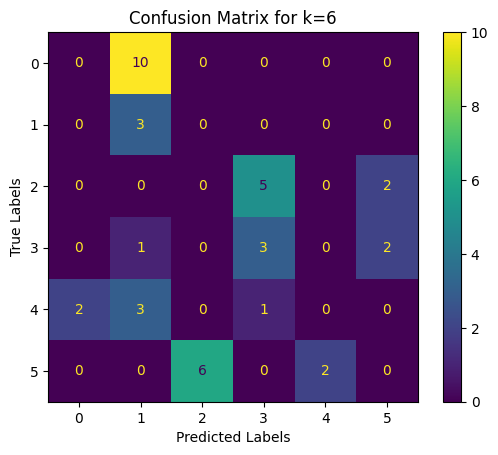

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

def analyse_clusters(labels_true, labels_pred, k):
    # Print classification report
    print(f"Classification Report for k={k}:")
    print(classification_report(labels_true, labels_pred))

    # Plot confusion matrix
    cm = confusion_matrix(labels_true, labels_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(labels_true))
    disp.plot(include_values=True)
    plt.title(f"Confusion Matrix for k={k}")
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()

# Data split
df_train = sdf1.head(200)
train_data_norm = df_train.drop('Star type', axis=1)
train_result = df_train['Star type']

df_test = sdf1.tail(40)
test_data_norm = df_test.drop('Star type', axis=1)
test_result = df_test['Star type']

# Standardize the features
scaler = StandardScaler()
train_data_scaled = scaler.fit_transform(train_data_norm)
test_data_scaled = scaler.transform(test_data_norm)

# Convert test result to numpy array for evaluation
test_result_arr = test_result.to_numpy()

# Define different values of k
k_values = [4,5,6]

# Loop through different k values for clustering
for k in k_values:
    # Initialize K-means with k clusters
    kmeans = KMeans(n_clusters=k, random_state=0)

    # Fit K-means on the combined dataset to create clusters
    kmeans.fit(np.vstack([train_data_scaled, test_data_scaled]))

    # Assign clusters as pseudo-labels
    train_clusters = kmeans.labels_[:len(train_data_scaled)]
    test_clusters = kmeans.labels_[-len(test_data_scaled):]

    # Analyze cluster assignment against true labels
    analyse_clusters(test_result_arr, test_clusters, k)


# Neironu tīkls

Eksperiments Nr. 1
Hiperparametri:
Slāņu skaits: 1
Neironu skaits slānī: 100
Maksimālais iterāciju skaits: 10000
Apmācības solis: adaptive
Slāņu aktivizācijas funkcija: logistic
              precision    recall  f1-score   support

         BrP       1.00      1.00      1.00        10
          SP       0.75      1.00      0.86         3
         BaP       1.00      1.00      1.00         7
         GSZ       1.00      0.83      0.91         6
         PmZ       1.00      1.00      1.00         6
         HmZ       1.00      1.00      1.00         8

    accuracy                           0.97        40
   macro avg       0.96      0.97      0.96        40
weighted avg       0.98      0.97      0.98        40



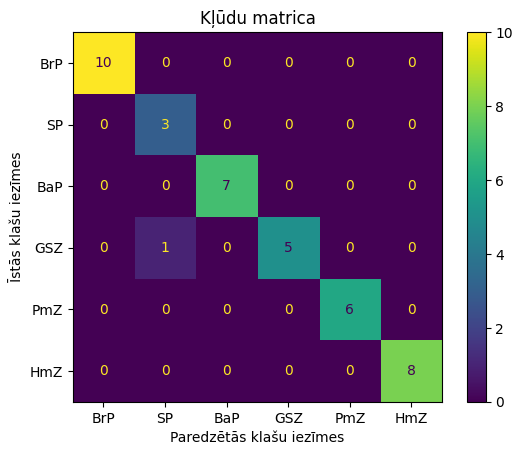

Eksperiments Nr. 2
Hiperparametri: 
Slāņu skaits: 1
Neironu skaits slānī: 10
Maksimālais iterāciju skaits: 10000
Apmācības solis: adaptive
Slāņu aktivizācijas funkcija: logistic
              precision    recall  f1-score   support

         BrP       1.00      1.00      1.00        10
          SP       0.75      1.00      0.86         3
         BaP       1.00      1.00      1.00         7
         GSZ       0.83      0.83      0.83         6
         PmZ       1.00      0.83      0.91         6
         HmZ       1.00      1.00      1.00         8

    accuracy                           0.95        40
   macro avg       0.93      0.94      0.93        40
weighted avg       0.96      0.95      0.95        40



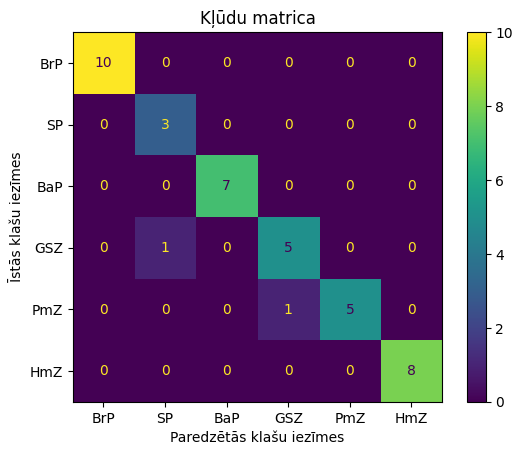

Eksperiments Nr. 3
Hiperparametri: 
Slāņu skaits: 3
Neironu skaits slānī: 500
Maksimālais iterāciju skaits: 10000
Apmācības solis: adaptive
Slāņu aktivizācijas funkcija: logistic
              precision    recall  f1-score   support

         BrP       1.00      1.00      1.00        10
          SP       0.75      1.00      0.86         3
         BaP       1.00      1.00      1.00         7
         GSZ       1.00      0.83      0.91         6
         PmZ       1.00      1.00      1.00         6
         HmZ       1.00      1.00      1.00         8

    accuracy                           0.97        40
   macro avg       0.96      0.97      0.96        40
weighted avg       0.98      0.97      0.98        40



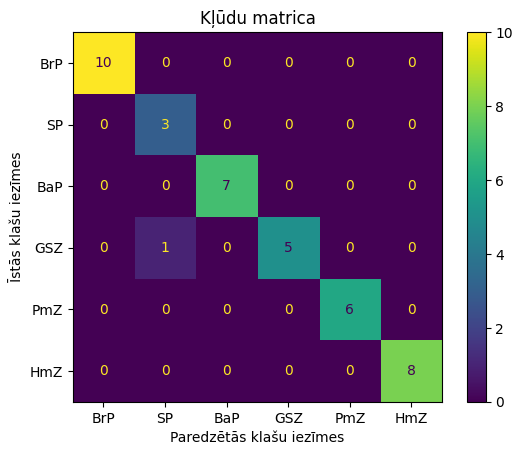

Eksperiments Nr. 4
Hiperparametri: 
Slāņu skaits: 3
Neironu skaits slānī: 500
Maksimālais iterāciju skaits: 10000
Apmācības solis: constant
Slāņu aktivizācijas funkcija: logistic
              precision    recall  f1-score   support

         BrP       1.00      1.00      1.00        10
          SP       1.00      1.00      1.00         3
         BaP       1.00      1.00      1.00         7
         GSZ       1.00      1.00      1.00         6
         PmZ       1.00      1.00      1.00         6
         HmZ       1.00      1.00      1.00         8

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



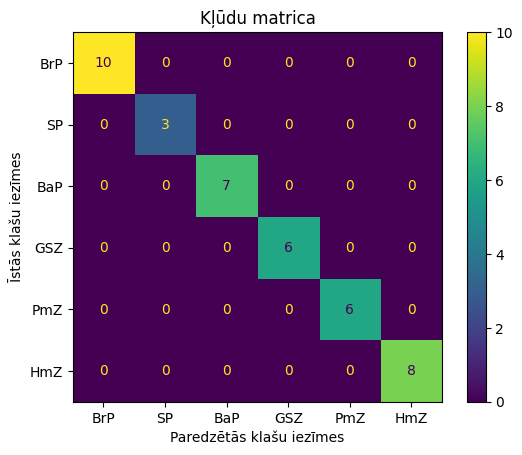

Eksperiments Nr. 5
Hiperparametri: 
Slāņu skaits: 3
Neironu skaits slānī: 500
Maksimālais iterāciju skaits: 10000
Apmācības solis: adaptive
Slāņu aktivizācijas funkcija: tanh
              precision    recall  f1-score   support

         BrP       0.91      1.00      0.95        10
          SP       0.67      0.67      0.67         3
         BaP       1.00      1.00      1.00         7
         GSZ       1.00      0.83      0.91         6
         PmZ       1.00      1.00      1.00         6
         HmZ       1.00      1.00      1.00         8

    accuracy                           0.95        40
   macro avg       0.93      0.92      0.92        40
weighted avg       0.95      0.95      0.95        40



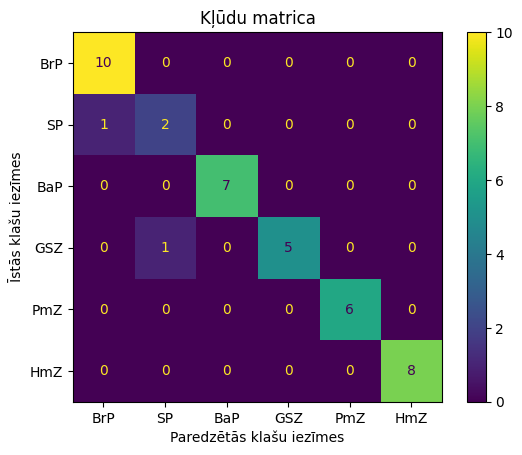

In [ ]:
from sklearn.neural_network import MLPClassifier


exp_nr = 1
print("Eksperiments Nr. "+str(exp_nr))
print("="*50)
print("Hiperparametri:")
print("Slāņu skaits: 1")
print("Neironu skaits slānī: 100")
print("Maksimālais iterāciju skaits: "+str(int(1e4)))
print("Apmācības solis: adaptive")
print("Slāņu aktivizācijas funkcija: logistic")
print("="*50)
neural_net_model = MLPClassifier(
    hidden_layer_sizes=(100),
    max_iter = int(1e4),
    learning_rate = 'adaptive',
    activation = 'logistic'
  )
neural_net_model.fit(train_data_norm, train_result_norm)
predictions = neural_net_model.predict(test_data_norm)
analyse_results(predictions, test_result_norm)
exp_nr += 1
print("="*50)

print("Eksperiments Nr. "+str(exp_nr))
print("="*50)
print("Hiperparametri: ")
print("Slāņu skaits: 1")
print("Neironu skaits slānī: 10")
print("Maksimālais iterāciju skaits: "+str(int(1e4)))
print("Apmācības solis: adaptive")
print("Slāņu aktivizācijas funkcija: logistic")
print("="*50)
neural_net_model = MLPClassifier(
    hidden_layer_sizes=(10),
    max_iter = int(1e4),
    learning_rate = 'adaptive',
    activation = 'logistic'
  )
neural_net_model.fit(train_data_norm, train_result_norm)
predictions = neural_net_model.predict(test_data_norm)
analyse_results(predictions, test_result_norm)
exp_nr += 1
print("="*50)

print("Eksperiments Nr. "+str(exp_nr))
print("="*50)
print("Hiperparametri: ")
print("Slāņu skaits: 3")
print("Neironu skaits slānī: 500")
print("Maksimālais iterāciju skaits: "+str(int(1e4)))
print("Apmācības solis: adaptive")
print("Slāņu aktivizācijas funkcija: logistic")
print("="*50)
neural_net_model = MLPClassifier(
    hidden_layer_sizes=(500, 500, 500),
    max_iter = int(1e4),
    learning_rate = 'adaptive',
    activation = 'logistic'
  )
neural_net_model.fit(train_data_norm, train_result_norm)
predictions = neural_net_model.predict(test_data_norm)
analyse_results(predictions, test_result_norm)
exp_nr += 1
print("="*50)

print("Eksperiments Nr. "+str(exp_nr))
print("="*50)
print("Hiperparametri: ")
print("Slāņu skaits: 3")
print("Neironu skaits slānī: 500")
print("Maksimālais iterāciju skaits: "+str(int(1e4)))
print("Apmācības solis: constant")
print("Slāņu aktivizācijas funkcija: logistic")
print("="*50)
neural_net_model = MLPClassifier(
    hidden_layer_sizes=(500, 500, 500),
    max_iter = int(1e4),
    learning_rate = 'constant',
    activation = 'logistic'
  )
neural_net_model.fit(train_data_norm, train_result_norm)
predictions = neural_net_model.predict(test_data_norm)
analyse_results(predictions, test_result_norm)
exp_nr += 1
print("="*50)

print("Eksperiments Nr. "+str(exp_nr))
print("="*50)
print("Hiperparametri: ")
print("Slāņu skaits: 3")
print("Neironu skaits slānī: 500")
print("Maksimālais iterāciju skaits: "+str(int(1e4)))
print("Apmācības solis: adaptive")
print("Slāņu aktivizācijas funkcija: tanh")
print("="*50)
neural_net_model = MLPClassifier(
    hidden_layer_sizes=(500, 500, 500),
    max_iter = int(1e4),
    learning_rate = 'adaptive',
    activation = 'tanh'
  )
neural_net_model.fit(train_data_norm, train_result_norm)
predictions = neural_net_model.predict(test_data_norm)
analyse_results(predictions, test_result_norm)
exp_nr += 1
print("="*50)

# kNN algoritms

Kad nepieciešams noteikt jaunās instances klasi, kNN meklē k tuvākos kaimiņus apmācības datu kopā, izmantojot noteiktu attāluma mēru. Pēc tam tas piešķir instancei klasi, kas ir visbiežāk sastopama starp tās k tuvākajiem kaimiņiem.

Eksperiments Nr. 1
Hiperparametri: k = 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3
           2       1.00      0.86      0.92         7
           3       1.00      0.83      0.91         6
           4       0.86      1.00      0.92         6
           5       0.78      0.88      0.82         8

    accuracy                           0.93        40
   macro avg       0.94      0.93      0.93        40
weighted avg       0.93      0.93      0.93        40



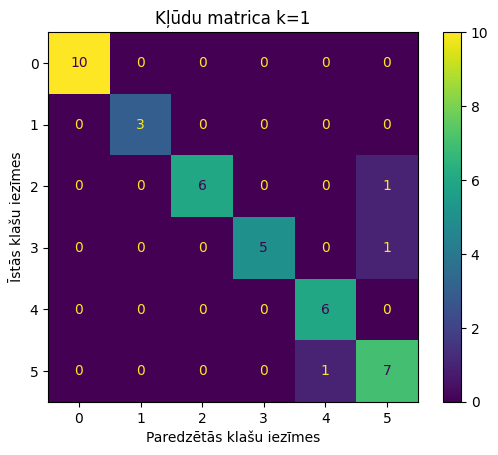

Eksperiments Nr. 2
Hiperparametri: k = 2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3
           2       0.78      1.00      0.88         7
           3       1.00      0.83      0.91         6
           4       1.00      0.83      0.91         6
           5       0.88      0.88      0.88         8

    accuracy                           0.93        40
   macro avg       0.94      0.92      0.93        40
weighted avg       0.94      0.93      0.93        40



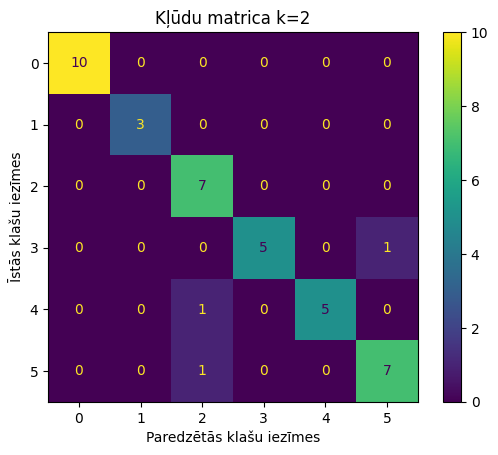

Eksperiments Nr. 3
Hiperparametri: k = 3
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3
           2       0.78      1.00      0.88         7
           3       1.00      0.83      0.91         6
           4       1.00      0.83      0.91         6
           5       0.88      0.88      0.88         8

    accuracy                           0.93        40
   macro avg       0.94      0.92      0.93        40
weighted avg       0.94      0.93      0.93        40



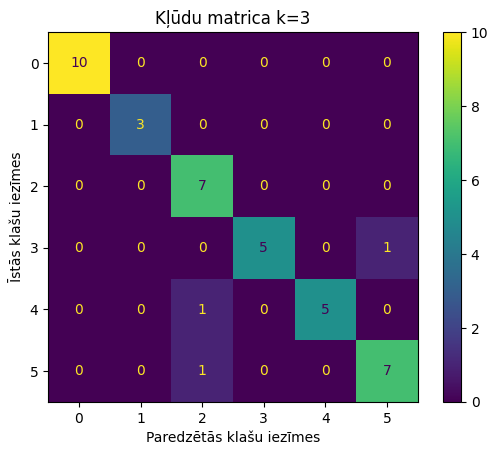

Eksperiments Nr. 4
Hiperparametri: k = 4
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3
           2       0.78      1.00      0.88         7
           3       1.00      0.83      0.91         6
           4       0.83      0.83      0.83         6
           5       0.86      0.75      0.80         8

    accuracy                           0.90        40
   macro avg       0.91      0.90      0.90        40
weighted avg       0.91      0.90      0.90        40



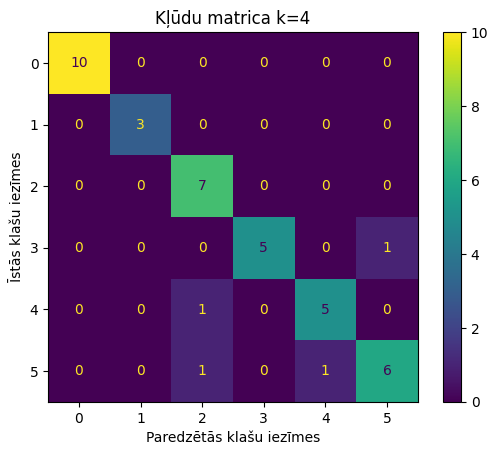

Eksperiments Nr. 5
Hiperparametri: k = 5
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         3
           2       0.78      1.00      0.88         7
           3       1.00      0.83      0.91         6
           4       1.00      0.83      0.91         6
           5       0.88      0.88      0.88         8

    accuracy                           0.93        40
   macro avg       0.94      0.92      0.93        40
weighted avg       0.94      0.93      0.93        40



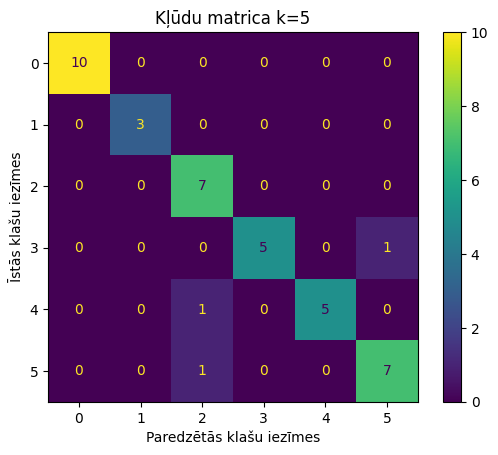

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def analyse_results(predictions, test_result_arr, k):
    # Print classification report
    print(classification_report(test_result_arr, predictions))

    # Plot confusion matrix
    cm = confusion_matrix(test_result_arr, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(test_result_arr))
    disp.plot(include_values=True)
    plt.title(f"Kļūdu matrica k={k}")
    plt.xlabel('Paredzētās klašu iezīmes')
    plt.ylabel('Īstās klašu iezīmes')
    plt.show()

# Data split
df_train = sdf.head(200)
train_data = df_train.drop('Star type', axis=1)
train_result = df_train['Star type']

df_test = sdf.tail(40)
test_data = df_test.drop('Star type', axis=1)
test_result = df_test['Star type']

# Convert test result to numpy array for evaluation
test_result_arr = test_result.to_numpy()

# Define different values of k
k_values = [1, 2, 3, 4, 5]

# Loop through different experiments
for i, k in enumerate(k_values):
    print(f"Eksperiments Nr. {i+1}")
    print(f"Hiperparametri: k = {k}")

    # Initialize kNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)

    # Train the classifier
    knn.fit(train_data, train_result)

    # Make predictions
    predictions = knn.predict(test_data)

    # Analyze results
    analyse_results(predictions, test_result_arr, k)


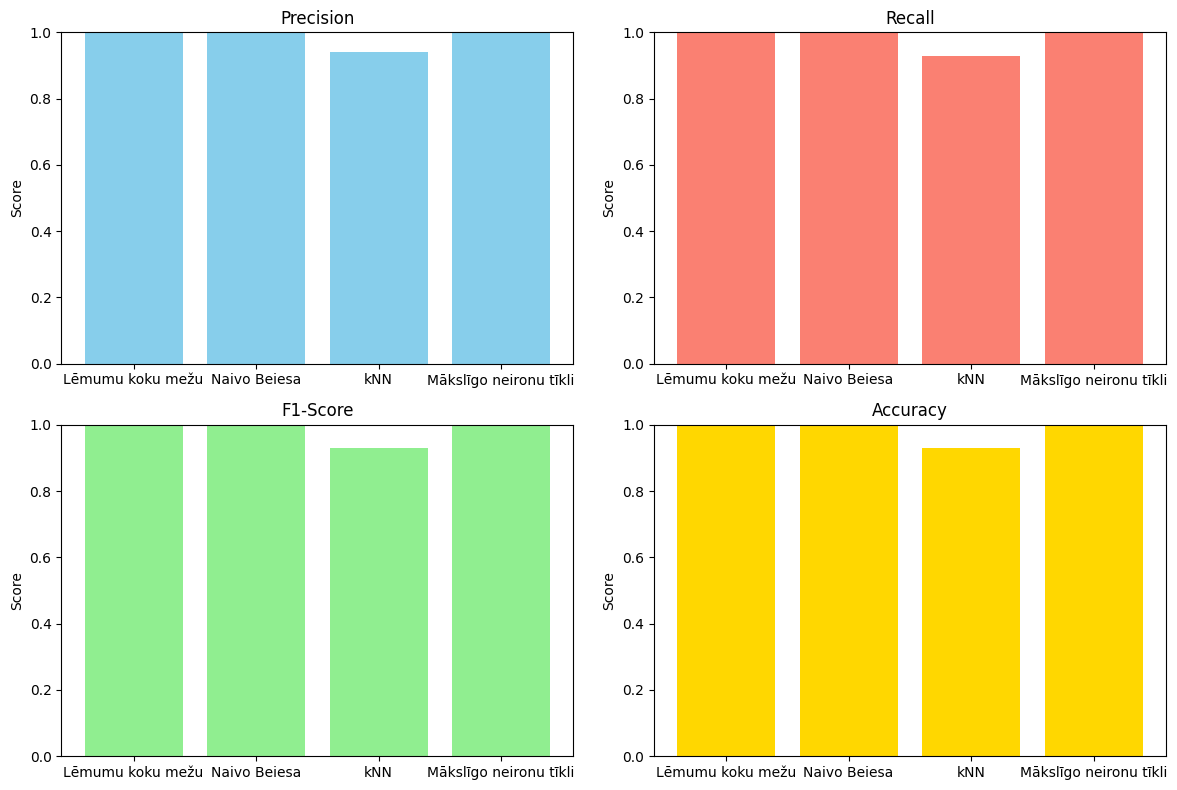

In [ ]:
import matplotlib.pyplot as plt #plot
experiments = [
    {
        "name": "Lēmumu koku mežu",
        "precision": 1.00,
        "recall": 1.00,
        "f1-score": 1.00,
        "accuracy": 1.00
    },
    {
        "name": "Naivo Beiesa",
        "precision": 1.00,
        "recall": 1.00,
        "f1-score": 1.00,
        "accuracy": 1.00
    },
    {
        "name": "kNN",
        "precision": 0.94,
        "recall": 0.93,
        "f1-score": 0.93,
        "accuracy": 0.93
    },
    {
        "name": "Mākslīgo neironu tīkli",
        "precision": 1.00,
        "recall": 1.00,
        "f1-score": 1.00,
        "accuracy": 1.00
    }
]

names = [exp["name"] for exp in experiments]
precision = [exp["precision"] for exp in experiments]
recall = [exp["recall"] for exp in experiments]
f1_score = [exp["f1-score"] for exp in experiments]
accuracy = [exp["accuracy"] for exp in experiments]

fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax[0, 0].bar(names, precision, color='skyblue')
ax[0, 0].set_title('Precision')
ax[0, 1].bar(names, recall, color='salmon')
ax[0, 1].set_title('Recall')
ax[1, 0].bar(names, f1_score, color='lightgreen')
ax[1, 0].set_title('F1-Score')
ax[1, 1].bar(names, accuracy, color='gold')
ax[1, 1].set_title('Accuracy')

for i in range(2):
    for j in range(2):
        ax[i, j].set_ylim(0, 1)
        ax[i, j].set_ylabel('Score')

plt.tight_layout()
plt.show()